In [1]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.optimize import fsolve
from scipy.signal.windows import kaiser

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as fft

def get_random_smooth_function(N, upsample_factor=10, seed=32):
    N_f = N//3
    rng = np.random.default_rng(seed)
    x_f = rng.normal(0,1,N_f)+1j*rng.normal(0,1,N_f)
    # generate 0 high frequencies
    zeroes_pad = np.zeros(N-N_f)
    # make x_t real. f start at 0 than to fs/2 and than to negative f
    x_f = np.concatenate((x_f,zeroes_pad))
    x_f_up_sample = np.concatenate((x_f,np.zeros((upsample_factor-1)*len(x_f))))
    x_t = fft.ifft(x_f,norm='forward')
    x_t_up_sample = fft.ifft(x_f_up_sample,norm='forward')
    return np.real(x_t), np.real(x_t_up_sample)

In [3]:
def spine_plot(ax):
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

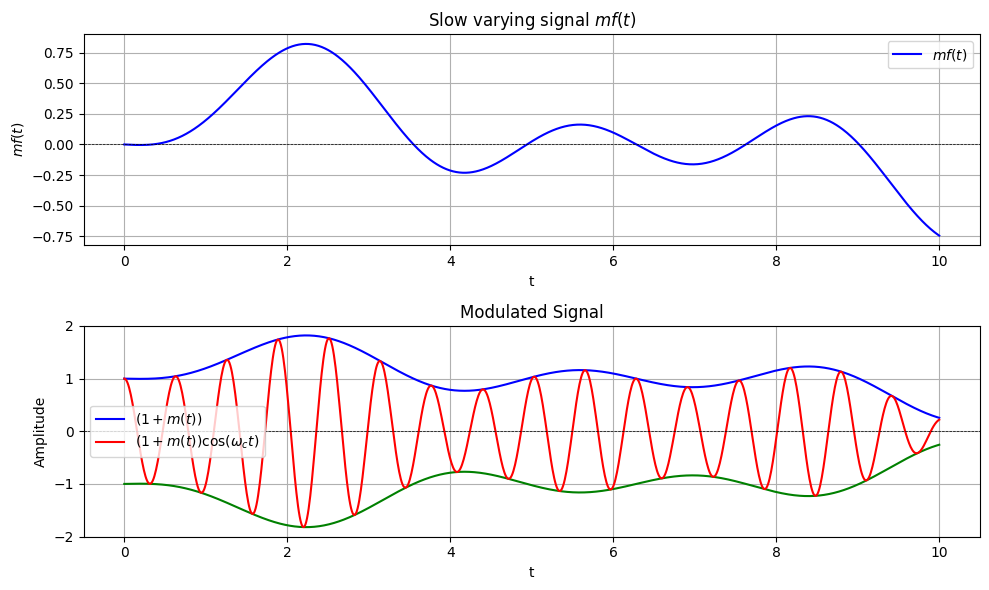

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
t = np.linspace(0, 10, 1000)

# Blue signal: Slow varying function (e.g., sine wave)
m_t = (np.sin(0.5 * t) + np.sin(t) -0.8* np.sin(2*t))/3

# Red signal: Cosine wave modulated by (1 + m(t))
carrier_frequency = 10
red_signal = (1 + m_t) * np.cos(carrier_frequency * t)

# Plot the blue and red signals
plt.figure(figsize=(10, 6))

# Plot blue signal
plt.subplot(2, 1, 1)
plt.plot(t, m_t, label=r"$mf(t)$", color='blue')
plt.title("Slow varying signal $mf(t)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("$mf(t)$")
plt.grid(True)
plt.legend()

# Plot red signal
plt.subplot(2, 1, 2)
plt.plot(t, 1 + m_t, label=r"$(1 + m(t))$", color='blue')
plt.plot(t, -1 - m_t, color='green')
plt.plot(t, red_signal, label=r"$(1 + m(t)) \cos(\omega_c t)$", color='red')
plt.title("Modulated Signal")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
np.roll(data_noise,400)[400-5:400+5]

array([4, 3, 2, 1, 0, 0, 1, 2, 3, 4])

1000


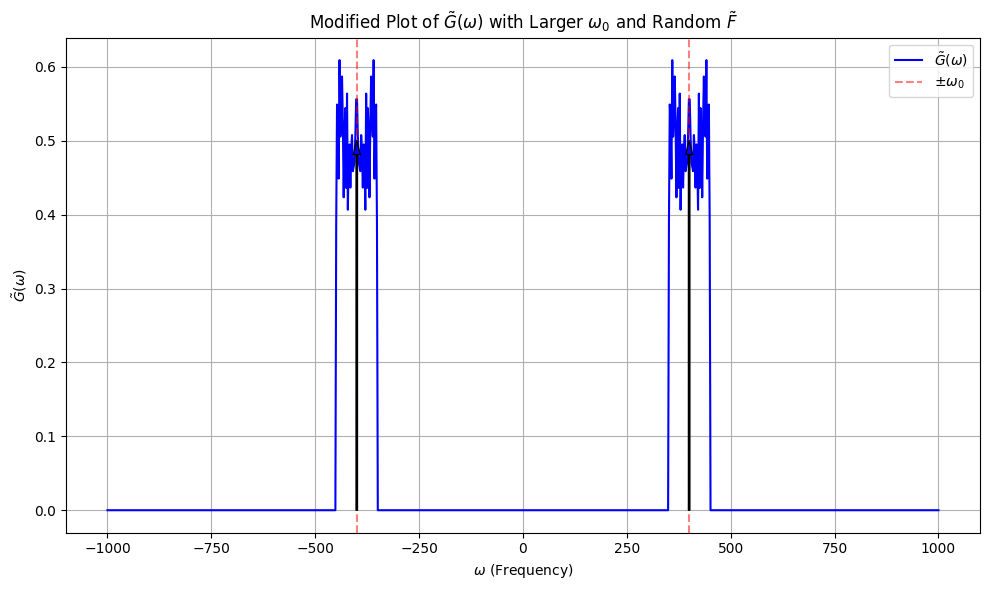

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# Increase omega_0 and make F_tilde more "random"
omega_0 = 400  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_noise = np.random.normal(1,0.1,len(omega)//2)
# data_noise = np.arange(len(omega)//2)
data_noise = np.hstack((data_noise,data_noise[::-1]))
print(len(data_noise))
# Define a more "random" F_tilde function using a noisy Gaussian
def F_tilde_random(omega,omega_0, sigma=50):
    rect = (omega<sigma)*(omega>-sigma)
    data = data_noise*rect
    data = np.roll(data,len(data)//2+np.abs(omega_0)-100)
    if omega_0<0:
        data = data[::-1]
    return data

# Reconstruct G_tilde with the new parameters
G_tilde = 0.5 * (
    m * F_tilde_random(omega, omega_0) +
    m * F_tilde_random(omega, - omega_0)
)

# Plot the function
plt.figure(figsize=(10, 6))

# Plot G_tilde
plt.plot(omega, G_tilde, label=r"$\tilde{G}(\omega)$", color='blue')

# Add more prominent arrows for the delta functions
arrow_props = dict(facecolor='blue', edgecolor='black', shrink=0, width=1, headwidth=5, headlength=10)
plt.annotate("", xy=(omega_0, 0.5), xytext=(omega_0, 0), arrowprops=arrow_props)
plt.annotate("", xy=(-omega_0, 0.5), xytext=(-omega_0, 0), arrowprops=arrow_props)

# Highlight the positions of the delta functions
plt.axvline(omega_0, color='red', linestyle='--', alpha=0.5, label=r"$\pm \omega_0$")
plt.axvline(-omega_0, color='red', linestyle='--', alpha=0.5)

plt.title(r"Modified Plot of $\tilde{G}(\omega)$ with Larger $\omega_0$ and Random $\tilde{F}$")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

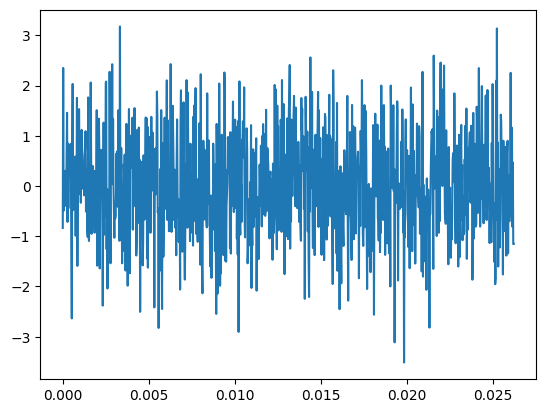

In [93]:
fs = 40000
N = 1050
time_axis = np.arange(N)/fs
f0 = 1000
f1 = 10000
sig_t = np.random.normal(0,1,N)
plt.figure()
plt.plot(time_axis,sig_t)

In [94]:
import scipy.fft as fft 

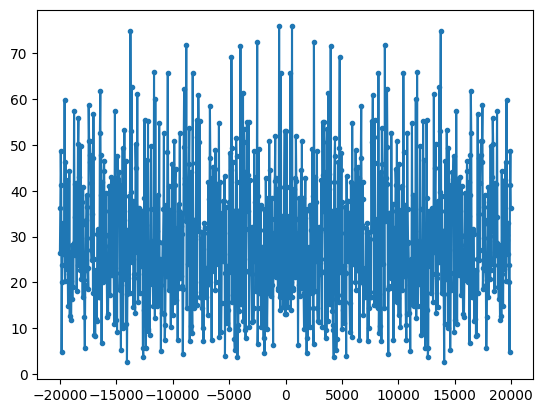

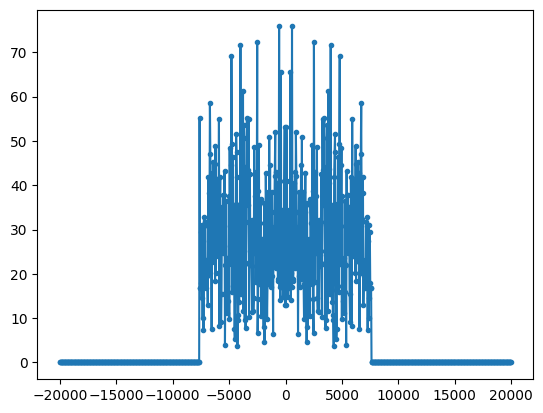

In [95]:
rect_N = 400
rect_f = np.concatenate((np.zeros(N//2-rect_N//2),np.ones(rect_N),np.zeros(N//2-rect_N//2)))
sig_f = fft.fftshift(fft.fft(sig_t))
sig_f_bpf = sig_f*rect_f
freq_axis = fft.fftshift(fft.fftfreq(N,1/fs))
plt.figure()
plt.plot(freq_axis,np.abs(sig_f),'.-')
plt.figure()
plt.plot(freq_axis,np.abs(sig_f_bpf),'.-')

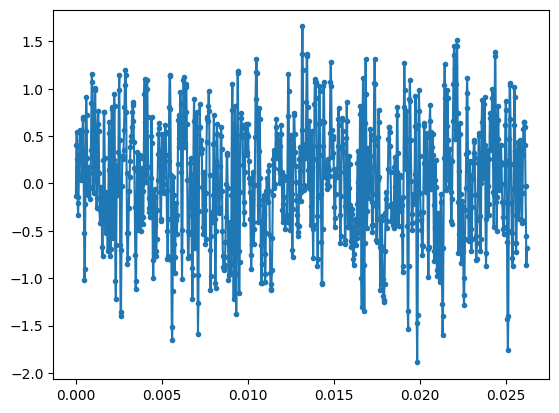

In [101]:
sig_t_bpf = fft.ifft(fft.ifftshift(sig_f_bpf))
plt.figure()
plt.plot(time_axis,sig_t_bpf,'.-')

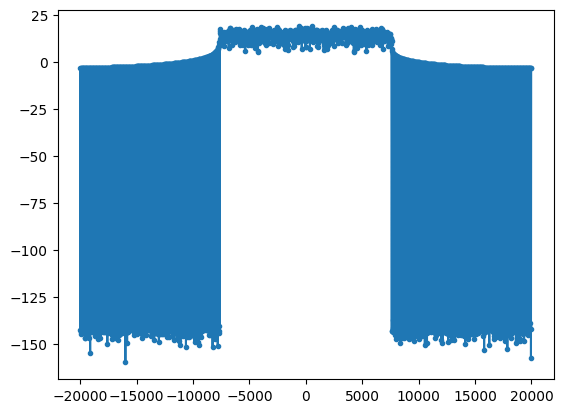

In [107]:
sig_t_bpf_pad = np.concatenate((sig_t_bpf,np.zeros(len(sig_t_bpf))))
sig_f_bpf_pad = fft.fftshift(fft.fft(sig_t_bpf_pad))
freq_pad_axis = fft.fftshift(fft.fftfreq(len(sig_f_bpf_pad),1/fs))
plt.figure()
plt.plot(freq_pad_axis,10*np.log10(np.abs(sig_f_bpf_pad)),'.-')

# base band signal

In [4]:
import numpy as np
import matplotlib.pyplot as plt

seed = 45
rng=  np.random.default_rng(seed)
# Increase omega_0 and make F_tilde more "random"
omega_0 = 600  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_f = rng.normal(1,0.1,len(omega))
omega_max = 30
rect = (omega<omega_max)*(omega>-omega_max)
data_f = data_f*rect
data_f = np.roll(data_f,omega_0//2)

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, data_f, label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{F}(\omega)$ passband signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, data_f+data_f[::-1], label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{F}(\omega)$ transmited signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, np.roll(data_f,-omega_0//2), label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{Z}(\omega)$ baseband signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'data_noise' is not defined

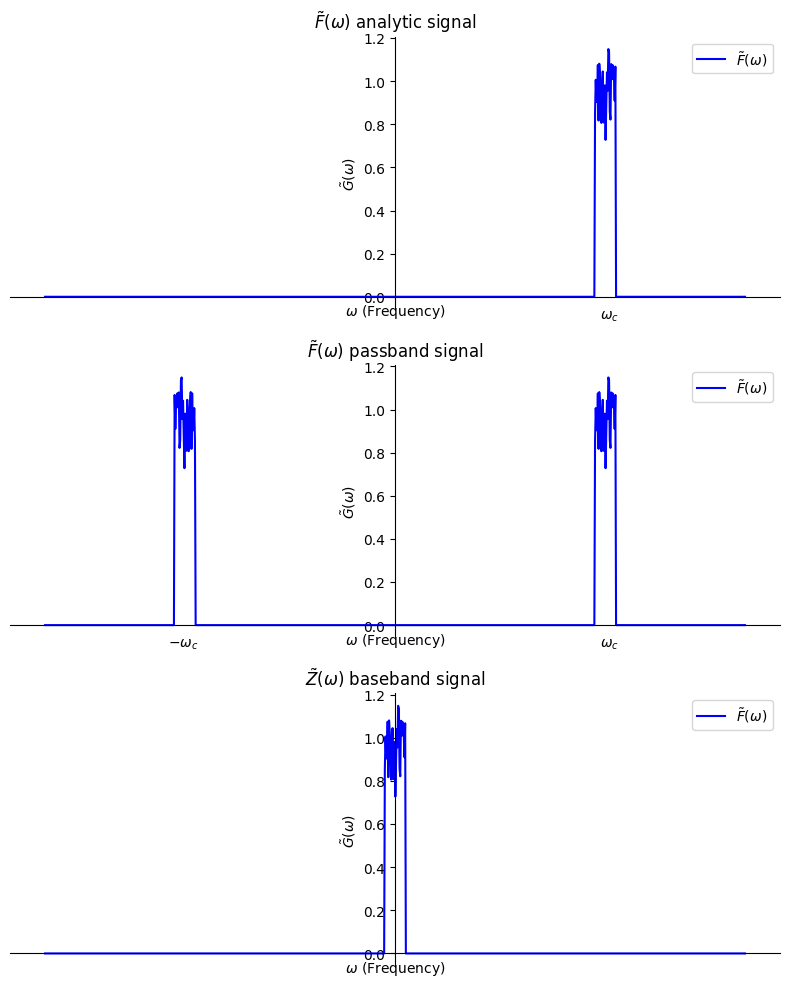

In [36]:
import numpy as np
import matplotlib.pyplot as plt

seed = 45
rng=  np.random.default_rng(seed)
# Increase omega_0 and make F_tilde more "random"
omega_0 = 600  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_f = rng.normal(1,0.1,len(omega))
omega_max = 30
rect = (omega<omega_max)*(omega>-omega_max)
data_f = data_f*rect
data_f = np.roll(data_f,omega_0//2)

fig, axes = plt.subplots(3, 1, figsize=(8, 10))
# analitic signal
axes[0].plot(omega, data_f, label=r"$\tilde{F}(\omega)$", color='blue')
axes[0].set_title(r"$\tilde{F}(\omega)$ analytic signal")
axes[0].set_xlabel(r"$\omega$ (Frequency)")
axes[0].set_ylabel(r"$\tilde{G}(\omega)$")
axes[0].get_xaxis().set_ticks([])
axes[0].annotate(r"$\omega_c$", xy=(omega_0, 0), xytext=(omega_0-15, -0.1))
spine_plot(axes[0])
axes[0].legend()

# analitic signal
axes[1].plot(omega, data_f+data_f[::-1], label=r"$\tilde{F}(\omega)$", color='blue')
axes[1].set_title(r"$\tilde{F}(\omega)$ passband signal")
axes[1].set_xlabel(r"$\omega$ (Frequency)")
axes[1].set_ylabel(r"$\tilde{G}(\omega)$")
axes[1].get_xaxis().set_ticks([])
# add \omega_c and -\omega_c annotate
axes[1].annotate(r"$\omega_c$", xy=(omega_0, 0), xytext=(omega_0-15, -0.1))
axes[1].annotate(r"$-\omega_c$", xy=(-omega_0, 0), xytext=(-omega_0-50, -0.1))
spine_plot(axes[1])
axes[1].legend()

# analitic signal
axes[2].plot(omega, np.roll(data_f,-omega_0//2), label=r"$\tilde{F}(\omega)$", color='blue')
axes[2].set_title(r"$\tilde{Z}(\omega)$ baseband signal")
axes[2].set_xlabel(r"$\omega$ (Frequency)")
axes[2].set_ylabel(r"$\tilde{G}(\omega)$")
axes[2].get_xaxis().set_ticks([])
spine_plot(axes[2])
axes[2].legend()
plt.tight_layout()
plt.show()

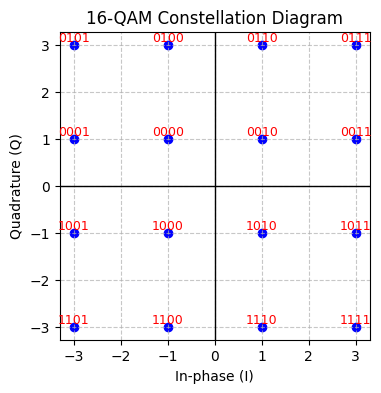

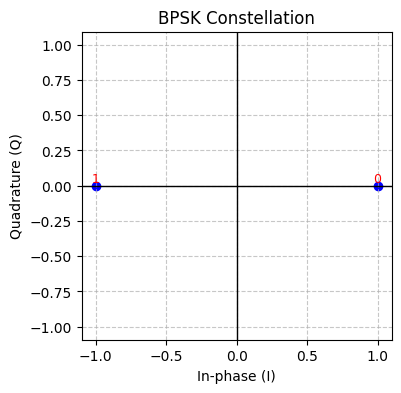

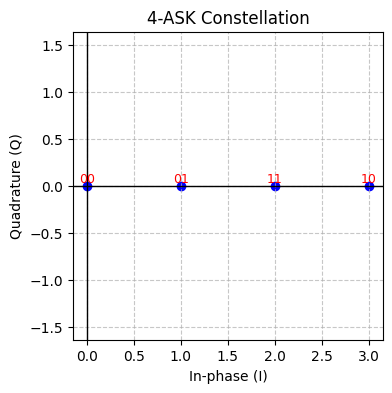

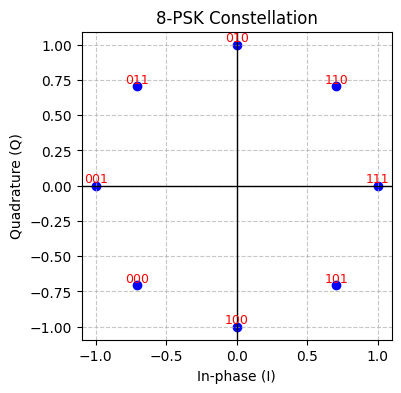

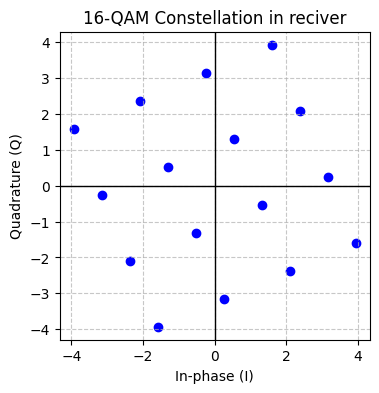

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_constellation(symbols, labels=None, title="Constellation Diagram"):
    """
    Plots a constellation diagram given complex symbols.

    Parameters:
    -----------
    symbols : array-like
        A sequence of complex numbers representing constellation points.
    labels : array-like, optional
        Labels corresponding to each symbol (e.g. binary strings).
    title : str, optional
        Title for the plot.

    Returns:
    --------
    None
    """
    symbols = np.array(symbols)
    x = np.real(symbols)
    y = np.imag(symbols)

    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, color='b', marker='o')

    # Annotate points if labels are provided
    if labels is not None and len(labels) == len(symbols):
        for xi, yi, lab in zip(x, y, labels):
            plt.text(xi, yi, lab, fontsize=9,
                     ha='center', va='bottom',
                     color='red')

    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.title(title)
    plt.xlabel('In-phase (I)')
    plt.ylabel('Quadrature (Q)')

    # Set equal scaling on both axes for a proper square plot
    plt.axis('equal')

    plt.show()

# Example: 16-QAM constellation points
# Typically arranged in a square grid, with equal spacing
# Here we define a simple 16-QAM with points at ±1 and ±3 for both I and Q.
I_values = np.array([-3, -1, 1, 3])
Q_values = np.array([-3j, -1j, 1j, 3j])
# Create grid of points
const_points = [i_val + q_val for i_val in I_values for q_val in Q_values]

# Optional: assign binary labels to each point (e.g., Gray-coded 16-QAM)
# Example labeling for demonstration only
labels = [
    "1101","1001","0001","0101",
    "1100","1000","0000","0100",
    "1110","1010","0010","0110",
    "1111","1011","0011","0111"
]
plot_constellation(const_points, labels, title="16-QAM Constellation Diagram")

bpsk_symbols = [1, -1]
bpsk_labels = ["0", "1"]  # Example labeling
plot_constellation(bpsk_symbols, bpsk_labels, title="BPSK Constellation")

ask_symbols = [0, 1, 2,  3]
ask_labels = ["00", "01", "11", "10"]  # Example binary labeling
plot_constellation(ask_symbols, ask_labels, title="4-ASK Constellation")

M = 8
angles = np.arange(M) * 2*np.pi/M
psk_symbols = [np.exp(1j*theta) for theta in angles]
# Example labels (just incremental binary)
psk_labels = ["111", "110","010","011","001","000","100","101"]
plot_constellation(psk_symbols, psk_labels, title="8-PSK Constellation")


# Example: 16-QAM constellation points
# Typically arranged in a square grid, with equal spacing
# Here we define a simple 16-QAM with points at ±1 and ±3 for both I and Q.
I_values = np.array([-3, -1, 1, 3])
Q_values = np.array([-3j, -1j, 1j, 3j])
# Create grid of points
const_points = [(i_val + q_val)*np.exp(1j*0.4) for i_val in I_values for q_val in Q_values]

# Optional: assign binary labels to each point (e.g., Gray-coded 16-QAM)
# Example labeling for demonstration only
plot_constellation(const_points, title="16-QAM Constellation in reciver")

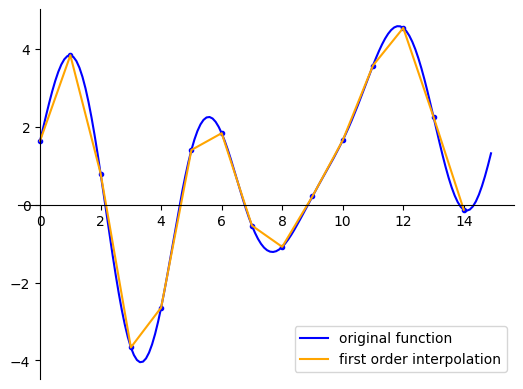

In [69]:
N = 15
fs = 1
upsample_factor = 10
t_axis = np.arange(N)/fs
t_updample_axis = np.arange(upsample_factor*N)/(upsample_factor*fs)
x_t,x_t_up_sample = get_random_smooth_function(N,upsample_factor)
plt.figure()
plt.plot(t_updample_axis,x_t_up_sample , color='b',label='original function')
plt.plot(t_axis,x_t,'.',  color='b')
plt.plot(t_axis,x_t,  color='orange', label='first order interpolation')
# edges = list(t_axis) + [len(t_axis)+1/fs]
# plt.stairs(x_t,edges,baseline=None, color='g', label='zero order interpolation')
plt.legend()
ax = plt.gca()
spine_plot(ax)


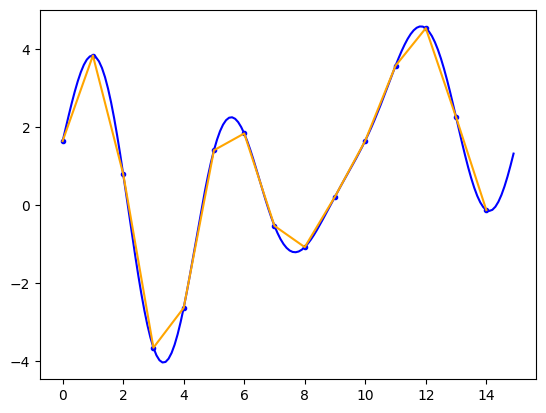

In [76]:
plt.figure()
plt.plot(t_updample_axis,x_t_up_sample , color='b',label='original function')
n_bits = 3

plt.plot(t_axis,x_t,'.',  color='b')
plt.plot(t_axis,x_t,  color='orange', label='first order interpolation')

In [81]:
x_norm_t  = (2**n_bits-1)*(x_t-x_t_up_sample.min())/(x_t_up_sample.max() - x_t_up_sample.min())
x_quantize_t = np.round(x_norm_t)/(2**n_bits-1)*(x_t_up_sample.max() - x_t_up_sample.min()) + x_t_up_sample.min()
levels = np.linspace(x_t_up_sample.min(),x_t_up_sample.max(),2**n_bits)

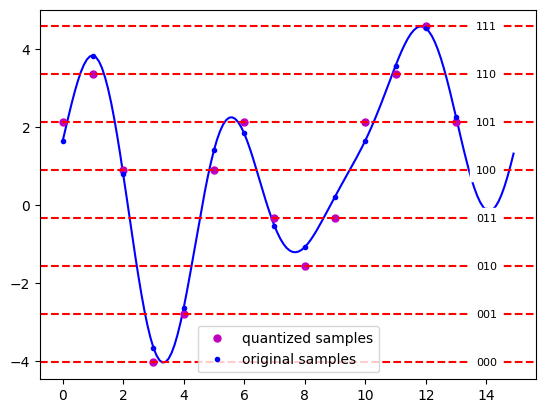

In [103]:
plt.figure()
plt.plot(t_updample_axis,x_t_up_sample , color='b')
plt.plot(t_axis,x_quantize_t,'.',  markersize=10,color='m', label='quantized samples')
plt.plot(t_axis,x_t,'.',color='b',label='original samples')
# plot quantization levels
for i, level in enumerate(levels):
    plt.axhline(level, color='r', linestyle='--', )
    plt.text(14, level, f"{i:03b}", fontsize=8, va='center', ha='center', backgroundcolor='w')
plt.legend()

Text(0.5, 0, '$t$')

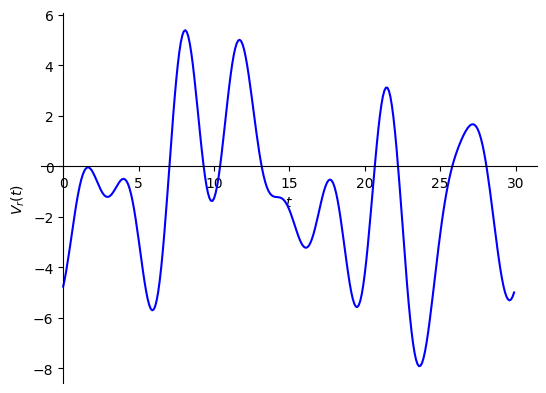

In [12]:
N = 30
fs = 1
upsample_factor = 10
t_axis = np.arange(N)/fs
t_updample_axis = np.arange(upsample_factor*N)/(upsample_factor*fs)
x_t,x_t_up_sample = get_random_smooth_function(N,upsample_factor, seed=1203)
plt.figure()
plt.plot(t_updample_axis,x_t_up_sample , color='b',label='original function')
ax = plt.gca()
spine_plot(ax)
plt.ylabel("$V_{r}(t)$")
plt.xlabel("$t$")

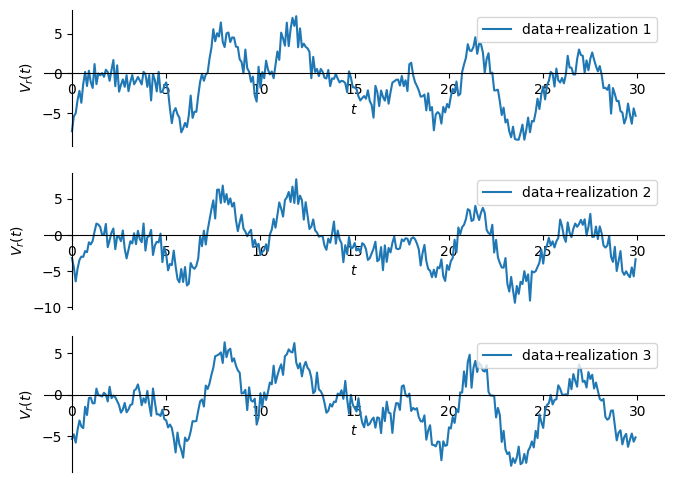

In [13]:
N = 30
fs = 1
upsample_factor = 10
t_axis = np.arange(N)/fs
t_updample_axis = np.arange(upsample_factor*N)/(upsample_factor*fs)
x_t,x_t_up_sample = get_random_smooth_function(N,upsample_factor, seed=1203)
noise1 = np.random.normal(0,1,len(x_t_up_sample))
noise2 = np.random.normal(0,1,len(x_t_up_sample))
noise3 = np.random.normal(0,1,len(x_t_up_sample))
fig,ax = plt.subplots(3,1,figsize=(8,6))
ax[0].plot(t_updample_axis,x_t_up_sample+noise1,label='data+realization 1')
ax[1].plot(t_updample_axis,x_t_up_sample+noise2,label='data+realization 2')
ax[2].plot(t_updample_axis,x_t_up_sample+noise3,label='data+realization 3')
for i in range(3):
    ax[i].set_ylabel("$V_{r}(t)$")
    ax[i].set_xlabel("$t$")
    spine_plot(ax[i])
    ax[i].legend()

### random telegraph process

Text(0.5, 0, 'time')

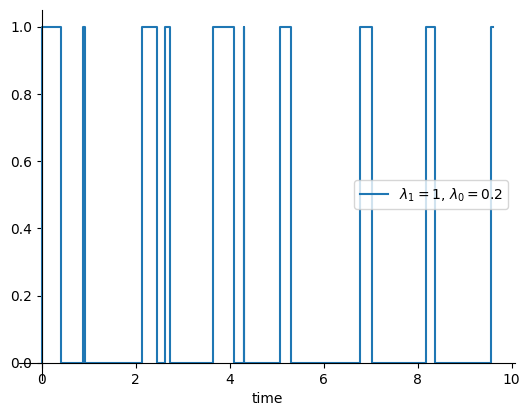

In [23]:
import numpy as np
import matplotlib.pyplot as plt

seed = 123125
rng = np.random.default_rng(seed)

N = 20
l1 = 1
l0 = 0.2

states = [0]
times = [0]

for i in range(N-1):
    exp_lambda = l1 if states[-1]==1 else l0
    transition_time = rng.exponential(exp_lambda)
    states.append(1 - states[-1])
    times.append(times[-1]+transition_time)
    
plt.figure()
plt.step(times,states, label=f'$\lambda_1={l1}$, $\lambda_0={l0}$')
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.xlabel('time')

### detection theory

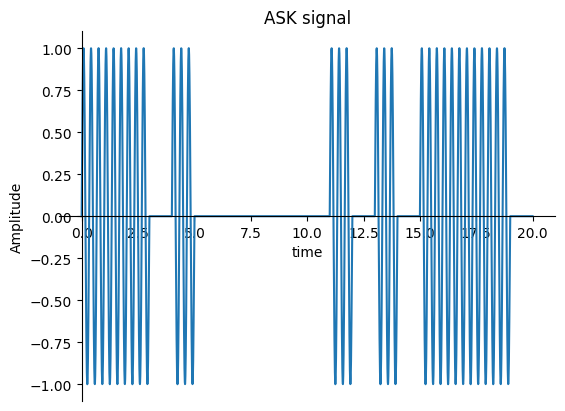

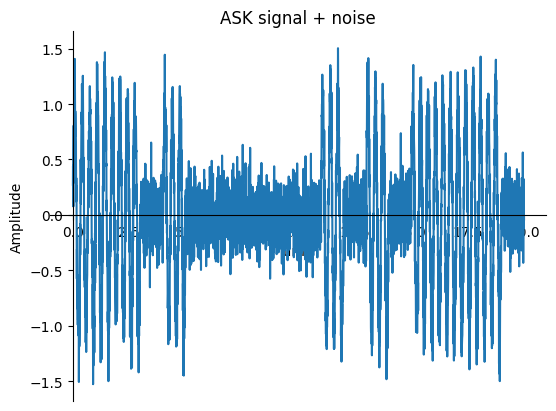

In [25]:
import numpy as np
import matplotlib.pyplot as plt

seed= 128
rng = np.random.default_rng(seed)

T_s = 1
fs = 200/T_s

# Generate ASK data
bits = rng.integers(0,2,20)

fc = 3
data = np.repeat(bits,int(fs*T_s))
t_axis = np.arange(len(data))/fs
osc = np.sin(2*np.pi*fc*t_axis)
data = data*osc

plt.figure()
plt.plot(t_axis,data)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('ASK signal')
ax = plt.gca()
spine_plot(ax)

noise = rng.normal(0,0.2,len(data))
data = data+noise
plt.figure()
plt.plot(t_axis,data)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('ASK signal + noise')
ax = plt.gca()
spine_plot(ax)

In [38]:
import scipy.signal as sig
f_nyq = fs/2
ripple_db = 60
trans_width = 3/f_nyq
cutoff_f = 1/f_nyq
N,beta = sig.kaiserord(ripple_db,trans_width)
filter_taps = sig.firwin(N, cutoff=cutoff_f, window=('kaiser', beta))
print(N)

243


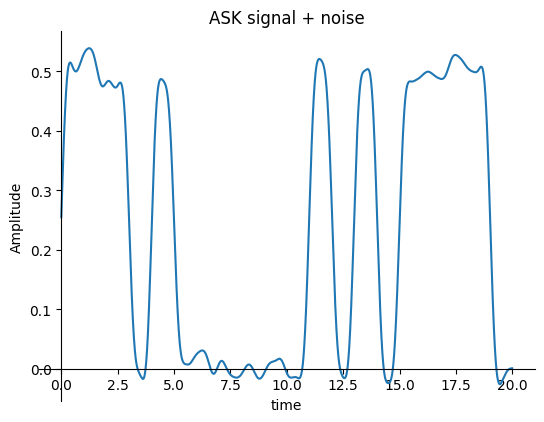

In [39]:
data_detect = osc*data
data_detect = np.convolve(data_detect, filter_taps,mode='same')
plt.figure()
plt.plot(t_axis,data_detect)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('ASK signal + noise')
ax = plt.gca()
spine_plot(ax)

In [88]:
# Generate ASK data
bits = rng.integers(0,2,200)

fc = 3
data = np.repeat(bits,int(fs*T_s))
data_sym = data.copy()
t_axis = np.arange(len(data))/fs
osc = np.sin(2*np.pi*fc*t_axis)
data = data*osc
noise = rng.normal(0,3,len(data))
data_noise = data+noise
data_detect = osc*data_noise
data_detect = np.convolve(data_detect, filter_taps,mode='same')

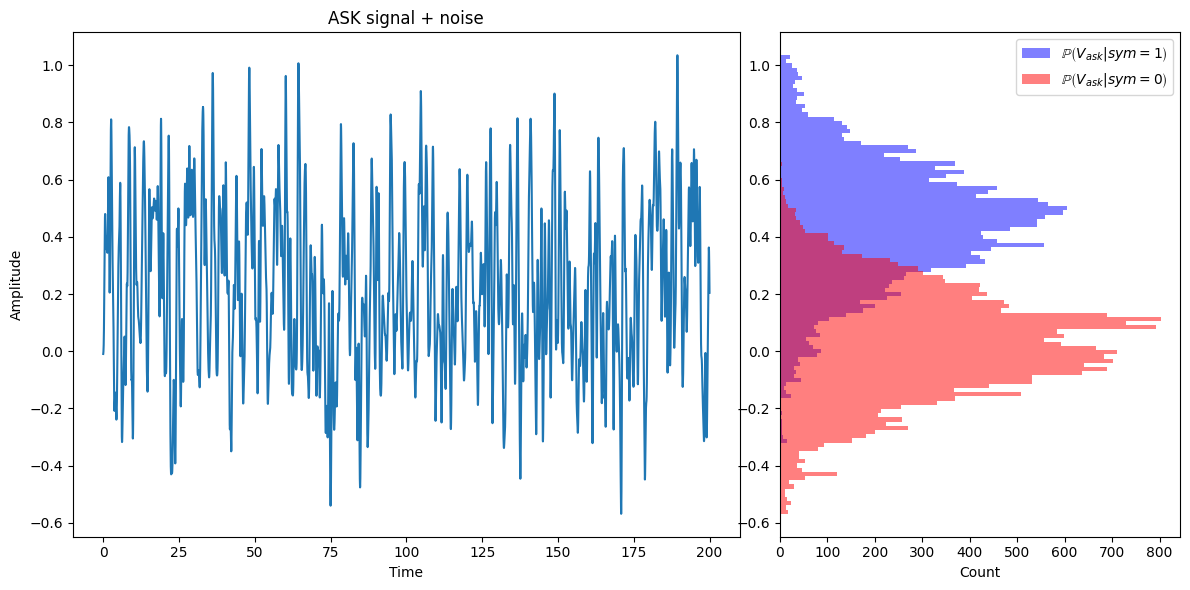

In [89]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t_axis, data_detect, label='Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('ASK signal + noise')

# Use make_axes_locatable to create a new axes on the right
divider = make_axes_locatable(ax)
ax_dist = divider.append_axes("right", size="60%", pad=0.4, sharey=ax)

# Plot a histogram of the data on the new axes
ax_dist.hist(data_detect[data_sym==1],color='b', orientation='horizontal', bins=100, label=r'$\mathbb{P}\left(V_{ask}|sym=1\right)$',alpha=0.5)
ax_dist.hist(data_detect[data_sym==0],color='r', orientation='horizontal', bins=100, label=r'$\mathbb{P}\left(V_{ask}|sym=0\right)$',alpha=0.5)
ax_dist.set_xlabel('Count')
ax_dist.legend()

# Remove y-axis labels/ticks on the distribution if you want them shared
# but not repeated. For example:
# plt.setp(ax_dist.get_yticklabels(), visible=False)
# ax_dist.yaxis.set_ticks_position('right')

plt.tight_layout()
plt.show()


In [5]:
from IPython.display import Audio
from scipy.io import wavfile
%matplotlib widget

In [28]:
fs, left = wavfile.read("left.wav") 
fs, left, len(left)

(44100, array([   0,    0,   -1, ..., -139, -146, -137], dtype=int16), 440320)

In [29]:
fs, right = wavfile.read("right.wav")
fs,right, len(right)

(44100, array([-12,   8,  -7, ..., -47, -35, -42], dtype=int16), 440320)

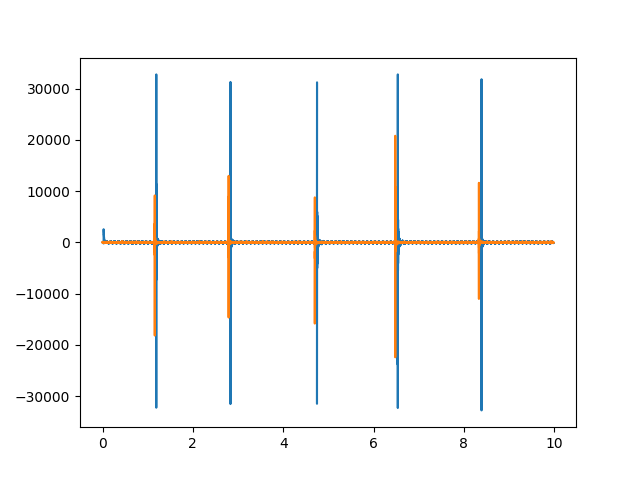

In [30]:
t_axis =np.arange(len(left))/fs
fig= plt.figure()
plt.plot(t_axis,left)
plt.plot(t_axis,right)

In [24]:
1.36114 - 1.34276,7.91022 - 7.87166

(0.018380000000000063, 0.038559999999999484)

### entropy

1

In [88]:
p=0.11
-np.log2(p**p)-np.log2((1-p)**(1-p))

np.float64(0.49991595816452805)

Text(0, 0.5, '$H\\left(p,1-p\\right)$')

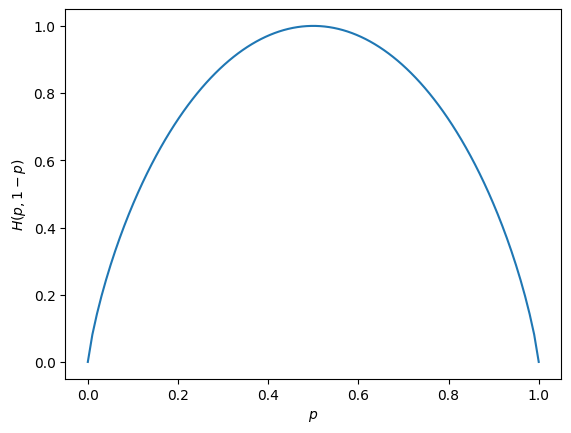

In [79]:
import numpy as np

p = np.linspace(0,1,100)
entropy = -np.log2(p**p)-np.log2((1-p)**(1-p))
plt.figure()
plt.plot(p,entropy)
plt.xlabel(r'$p$')
plt.ylabel(r'$H\left(p,1-p\right)$')

### shannon limiting entropy

In [ ]:
import numpy as np
import scipy.special as special

def seq_prob(num0, num1, p0):
    return (p0 ** num0)*((1 - p0)**num1)

def seq_num(num0, num1):
    return special.comb(num0 + num1,num0, exact=True)

In [101]:
seq_entropy

array([0.16812276, 0.77138312, 1.37464348, 1.97790385, 2.58116421,
       3.18442457])

In [102]:
seq_total_probs

array([5.58405945e-01, 3.45082325e-01, 8.53012490e-02, 1.05428510e-02,
       6.51524500e-04, 1.61051000e-05])

(-0.2, 3.0)

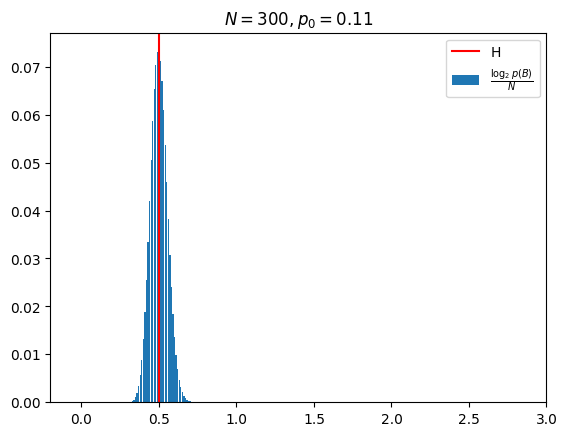

In [137]:
p0 = 0.11
N = 300
entropy = -p0*np.log2(p0)-(1-p0)*np.log2(1-p0)

seq_num0 = np.arange(N + 1)
seq_num1 = N - seq_num0
seq_probs = seq_prob(seq_num0, seq_num1, p0)
seq_entropy =-np.log2(seq_probs)/N 
seq_amount = np.array([seq_num(num0,num1) for num0,num1 in zip(seq_num0,seq_num1)])
seq_total_probs = seq_probs*seq_amount

plt.figure()
plt.bar(seq_entropy,seq_total_probs,width=2.5/N,label=r'$\frac{\log_{2}p\left(B\right)}{N}$')
plt.axvline(entropy, color='red',label='H')
plt.legend()
plt.title(f'$N={N}, p_0={p0}$')
plt.xlim(-0.2,3)

In [109]:
plt.bar??